<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-载入依赖库和数据" data-toc-modified-id="1.-载入依赖库和数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. 载入依赖库和数据</a></span><ul class="toc-item"><li><span><a href="#1.1-优化数据类型" data-toc-modified-id="1.1-优化数据类型-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 优化数据类型</a></span></li><li><span><a href="#1.2-数据检查与处理" data-toc-modified-id="1.2-数据检查与处理-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2 数据检查与处理</a></span><ul class="toc-item"><li><span><a href="#1.2.1-数值列处理" data-toc-modified-id="1.2.1-数值列处理-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>1.2.1 数值列处理</a></span></li><li><span><a href="#1.2.2-类别列处理" data-toc-modified-id="1.2.2-类别列处理-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>1.2.2 类别列处理</a></span></li></ul></li></ul></li><li><span><a href="#2.-线性回归-&amp;-五折交叉验证-&amp;-模拟真实业务情况" data-toc-modified-id="2.-线性回归-&amp;-五折交叉验证-&amp;-模拟真实业务情况-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. 线性回归 &amp; 五折交叉验证 &amp; 模拟真实业务情况</a></span><ul class="toc-item"><li><span><a href="#2.1-简单建模" data-toc-modified-id="2.1-简单建模-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 简单建模</a></span></li><li><span><a href="#2.2-五折交叉验证" data-toc-modified-id="2.2-五折交叉验证-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 五折交叉验证</a></span></li><li><span><a href="#2.3-模拟真实业务情况" data-toc-modified-id="2.3-模拟真实业务情况-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3 模拟真实业务情况</a></span></li><li><span><a href="#2.4-绘制学习曲线和验证曲线" data-toc-modified-id="2.4-绘制学习曲线和验证曲线-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>2.4 绘制学习曲线和验证曲线</a></span></li><li><span><a href="#2.5-多种模型对比" data-toc-modified-id="2.5-多种模型对比-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>2.5 多种模型对比</a></span><ul class="toc-item"><li><span><a href="#2.5.1-线性模型-&amp;-嵌入式特征选择" data-toc-modified-id="2.5.1-线性模型-&amp;-嵌入式特征选择-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>2.5.1 线性模型 &amp; 嵌入式特征选择</a></span></li><li><span><a href="#2.5.2-非线性模型" data-toc-modified-id="2.5.2-非线性模型-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>2.5.2 非线性模型</a></span></li></ul></li><li><span><a href="#2.6-模型调参" data-toc-modified-id="2.6-模型调参-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>2.6 模型调参</a></span><ul class="toc-item"><li><span><a href="#2.6.1-贪心调参" data-toc-modified-id="2.6.1-贪心调参-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>2.6.1 贪心调参</a></span></li><li><span><a href="#2.6.2-Grid-Search调参" data-toc-modified-id="2.6.2-Grid-Search调参-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>2.6.2 Grid Search调参</a></span></li><li><span><a href="#2.6.3-贝叶斯调参" data-toc-modified-id="2.6.3-贝叶斯调参-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>2.6.3 贝叶斯调参</a></span></li></ul></li></ul></li><li><span><a href="#3.-总结" data-toc-modified-id="3.-总结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. 总结</a></span></li></ul></div>

# 1. 载入依赖库和数据

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings('ignore')

## 1.1 优化数据类型

优化每一栏数据的类型，减少内存占用

In [193]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} KB'.format(start_mem / (1024)))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} KB'.format(end_mem / 1024))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [194]:
dataForTree = reduce_mem_usage(pd.read_csv('data_for_tree.csv'))

Memory usage of dataframe is 63754.16 KB
Memory usage after optimization is: 17299.34 KB
Decreased by 72.9%


## 1.2 数据检查与处理

In [195]:
dataForTree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199037 entries, 0 to 199036
Data columns (total 41 columns):
SaleID                    199037 non-null int32
name                      199037 non-null int32
model                     199036 non-null float16
brand                     199037 non-null int8
bodyType                  193130 non-null float16
fuelType                  187512 non-null float16
gearbox                   191173 non-null float16
power                     199037 non-null int16
kilometer                 199037 non-null float16
notRepairedDamage         199037 non-null category
seller                    199037 non-null int8
offerType                 199037 non-null int8
price                     149037 non-null float32
v_0                       199037 non-null float16
v_1                       199037 non-null float16
v_2                       199037 non-null float16
v_3                       199037 non-null float16
v_4                       199037 non-null float16
v_5

In [196]:
# 提取连续变量名称
continuousFeatures = [x for x in dataForTree.columns if x not in ['price', 'SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'seller', 'offerType', 'city', 'train']]
# 分桶数据如何处理？

In [197]:
# 区分训练数据和测试数据
trainData = dataForTree[dataForTree['train'] == 1]
testData = dataForTree[dataForTree['train'] == 0]

In [198]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149037 entries, 0 to 149036
Data columns (total 41 columns):
SaleID                    149037 non-null int32
name                      149037 non-null int32
model                     149036 non-null float16
brand                     149037 non-null int8
bodyType                  144543 non-null float16
fuelType                  140405 non-null float16
gearbox                   143083 non-null float16
power                     149037 non-null int16
kilometer                 149037 non-null float16
notRepairedDamage         149037 non-null category
seller                    149037 non-null int8
offerType                 149037 non-null int8
price                     149037 non-null float32
v_0                       149037 non-null float16
v_1                       149037 non-null float16
v_2                       149037 non-null float16
v_3                       149037 non-null float16
v_4                       149037 non-null float16
v_5

### 1.2.1 数值列处理

In [199]:
# 训练集缺失值检查
trainData.isnull().sum()

SaleID                        0
name                          0
model                         1
brand                         0
bodyType                   4494
fuelType                   8632
gearbox                    5954
power                         0
kilometer                     0
notRepairedDamage             0
seller                        0
offerType                     0
price                         0
v_0                           0
v_1                           0
v_2                           0
v_3                           0
v_4                           0
v_5                           0
v_6                           0
v_7                           0
v_8                           0
v_9                           0
v_10                          0
v_11                          0
v_12                          0
v_13                          0
v_14                          0
train                         0
usedTime                      0
city                      36450
brand_pr

In [200]:
# 【注意】测试集缺失值检查，如何处理？
testData.isnull().sum()

SaleID                        0
name                          0
model                         0
brand                         0
bodyType                   1413
fuelType                   2893
gearbox                    1910
power                         0
kilometer                     0
notRepairedDamage             0
seller                        0
offerType                     0
price                     50000
v_0                           0
v_1                           0
v_2                           0
v_3                           0
v_4                           0
v_5                           0
v_6                           0
v_7                           0
v_8                           0
v_9                           0
v_10                          0
v_11                          0
v_12                          0
v_13                          0
v_14                          0
train                         0
usedTime                      0
city                      12195
brand_pr

In [201]:
# 考虑到“city”列含有的缺失值较多，且当时提取的正确性不明确，先将此列删除
del trainData['city']
del testData['city']

# 再删除缺失值的行，将NA替换为0
trainData = trainData.dropna()

**补充处理**
由于在EDA和特征工程中为处理price数据，在此进行补充处理

通过作图发现price呈现长尾分布，不利于建模预测。原因是很多模型都假设数据误差项符合正态分布，而长尾分布的数据违背了这一假设。

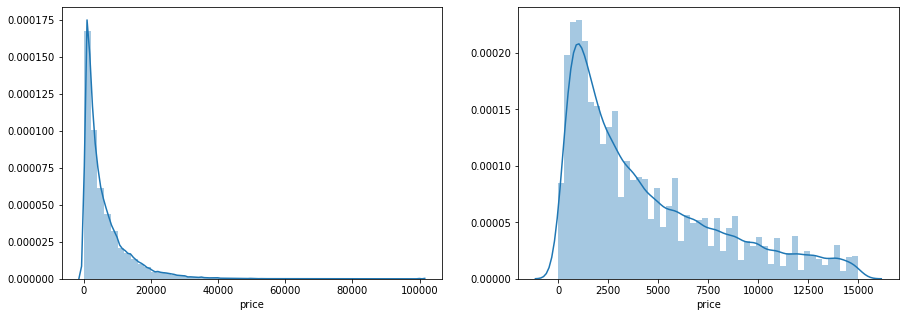

In [202]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(trainData['price'])
plt.subplot(1, 2, 2)
# 【注意】为什么要看这个？
sns.distplot(trainData['price'][trainData['price'] < np.quantile(trainData['price'], 0.9)])

In [203]:
# 对price列进行log转换
trainData['priceLn'] = np.log(trainData['price'] + 1)

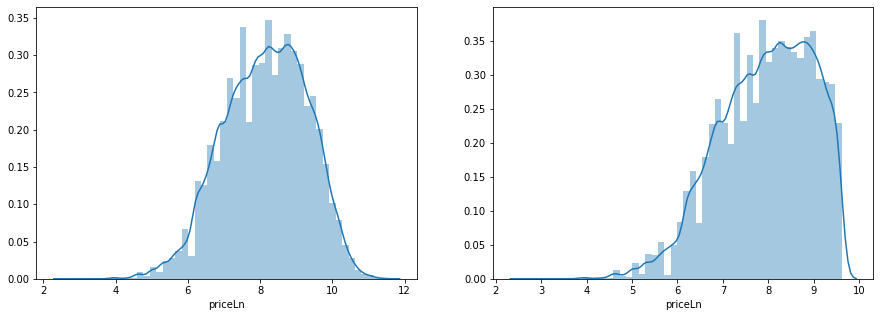

In [204]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(trainData['priceLn'])
plt.subplot(1, 2, 2)
sns.distplot(trainData['priceLn'][trainData['priceLn'] < np.quantile(trainData['priceLn'], 0.9)])

### 1.2.2 类别列处理

In [205]:
# 【注意】训练集'notRepairedDamage'列有14647个“-”，该如何处理？
(trainData['notRepairedDamage'] == '-').sum()

14647

In [206]:
# 暂时将训练集的“-”替换为0
trainData = trainData.replace('-', 0).reset_index(drop = True)

In [207]:
# 将类别列转换为数值列
trainData['notRepairedDamage'] = trainData['notRepairedDamage'].astype(np.float32)

In [208]:
# 再次检查
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127805 entries, 0 to 127804
Data columns (total 41 columns):
SaleID                    127805 non-null int64
name                      127805 non-null int64
model                     127805 non-null float64
brand                     127805 non-null int64
bodyType                  127805 non-null float64
fuelType                  127805 non-null float64
gearbox                   127805 non-null float64
power                     127805 non-null int64
kilometer                 127805 non-null float64
notRepairedDamage         127805 non-null float32
seller                    127805 non-null int64
offerType                 127805 non-null int64
price                     127805 non-null float64
v_0                       127805 non-null float64
v_1                       127805 non-null float64
v_2                       127805 non-null float64
v_3                       127805 non-null float64
v_4                       127805 non-null float64
v

# 2. 线性回归 & 五折交叉验证 & 模拟真实业务情况

In [342]:
# 提取特性数据和响应数据
train_x = trainData[continuousFeatures]
train_y = trainData['priceLn']

## 2.1 简单建模

In [210]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression(normalize = True)
LRModel = LRModel.fit(train_x, train_y)

查看训练的线性回归模型的截距（intercept）与权重（coef）

In [215]:
print('intercept: '+ str(LRModel.intercept_))
sorted(dict(zip(continuousFeatures, LRModel.coef_)).items(), key = lambda x:x[1], reverse = True)

intercept: 23.285877679036524


[('v_9', 7.3505475836563505),
 ('v_5', 5.3776062427604545),
 ('v_12', 1.8649301923105306),
 ('v_1', 1.59012012914238),
 ('v_11', 1.1657992087543363),
 ('v_13', 1.0717340443275432),
 ('v_3', 0.8464833187913721),
 ('v_7', 0.342055856298064),
 ('power_bin', 0.002503043339131023),
 ('power', 0.0011871854664794804),
 ('brand_price_less200per', 2.9601521344966628e-05),
 ('brand_price_count', 1.3380675727500656e-05),
 ('brand_price_median', 1.0306566689432173e-05),
 ('brand_price_min', 8.876992356812383e-06),
 ('brand_price_std', 7.863672134415422e-06),
 ('usedTime', 5.189143168184971e-06),
 ('brand_price_max', 6.348460090671045e-07),
 ('brand_price_sum', -1.4775826151468603e-09),
 ('brand_price_less200', -2.026869215632371e-06),
 ('brand_price_mean', -1.1492503425397582e-05),
 ('v_14', -0.01057444825832643),
 ('kilometer', -0.012395854780996862),
 ('v_0', -0.06955285203732496),
 ('v_4', -0.9062121579438489),
 ('v_2', -1.0143462846040392),
 ('v_10', -1.7355431259155476),
 ('v_8', -45.71304480

In [219]:
# 随机抽取训练集的50个数据作图
from matplotlib import pyplot as plt
subsampleIndex = np.random.randint(low = 0, high = len(train_y), size = 50)
subsampleIndex

array([ 51844,  77276,  51716,  82831,  23916,  18679, 124187, 126957,
       107125,  86820,  53828,  12963,  32773, 124417,  45608,  26945,
       126241,  16885,  21898,  63439,  61059,  43860,  22991,  78952,
       119316,  54467,  62799,  82388,   7570,  32275,   3506,  66088,
       122625,  81146,  93632,  17597,  28902,  19679,  39482, 116110,
        16304, 114498,  96877,  40797,  94436, 107156,  63647,  96392,
       114035,  83825])

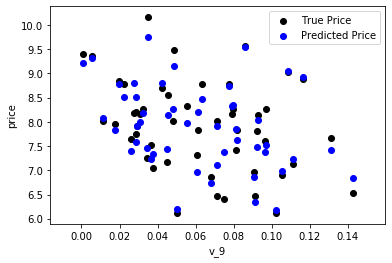

In [220]:
plt.scatter(train_x['v_9'][subsampleIndex], train_y[subsampleIndex], color = 'black')
plt.scatter(train_x['v_9'][subsampleIndex], LRModel.predict(train_x.loc[subsampleIndex]), color = 'blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price', 'Predicted Price'],loc = 'upper right')
plt.show()

## 2.2 五折交叉验证

In [316]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

In [344]:
# 用线性回归模型，对未处理标签的特征数据进行五折交叉验证
# 注意：因构建的函数里包含了对应变量的log转换步骤，故输入y应为转换前的数据
def log_transfer(func):
    def wrapper(y, yhat):
        # nan_to_num: 用零代替NaN，用大的有限数代替无穷大
        result = func(np.log(y + 1), np.nan_to_num(np.log(yhat + 1)))
        return result
    return wrapper

scores = cross_val_score(LRModel, X = train_x, y = trainData['price'], verbose = 1, cv = 5, scoring = make_scorer(log_transfer(mean_absolute_error)))
print('AvgMAE: ', np.mean(scores))
scores


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AvgMAE:  1.3976151041932492


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


array([1.38589625, 1.39078249, 1.40540287, 1.41825731, 1.3877366 ])

In [346]:
# 用线性回归模型，对处理过标签的特征数据进行五折交叉验证
# 注意：因构建的函数里包含了对应变量的log转换步骤，故输入y应为转换前的数据
scores = cross_val_score(LRModel, X = train_x, y = train_y, verbose = 1, cv = 5, scoring = make_scorer(mean_absolute_error))
print('AvgMAE: ', np.mean(scores))
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AvgMAE:  0.19402126591011806


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


array([0.19284941, 0.19383885, 0.19508718, 0.19333684, 0.19499405])

In [347]:
scores = pd.DataFrame(scores.reshape(1, -1))
scores.columns = ['CV' + str(x) for x in range(1, 6)]
scores.index = ['MAE']
scores

,CV1,CV2,CV3,CV4,CV5
MAE,0.192849,0.193839,0.195087,0.193337,0.194994


## 2.3 模拟真实业务情况

五折交叉验证在某些与时间相关的数据集上反映了不真实的情况，如通过2018年的二手车价格预测2017年的二手车价格是不合理的。因此，采用时间顺序对数据集进行分隔。在本例中，选用靠前时间的4/5样本当作训练集，靠后时间的1/5当作验证集，发现最终结果与五折交叉验证差距不大。

In [324]:
trainData = trainData.reset_index(drop = True)
split_point = len(trainData) // 5 * 4 # 取整数

train = trainData.loc[:split_point].dropna()
val = trainData.loc[split_point:].dropna()

train_x = train[continuousFeatures]
train_y = train['priceLn']
val_x = val[continuousFeatures]
val_y = val['priceLn']

LRModel = LinearRegression(normalize = True)
LRModel = LRModel.fit(train_x, train_y)
mean_absolute_error(val_y, LRModel.predict(val_x))

0.1949937685736532

## 2.4 绘制学习曲线和验证曲线

**学习曲线**

一种用来判断训练模型的一种方法，通过观察绘制出来的学习曲线图，可比较直观了解模型的状态，如：过拟合（overfitting）或欠拟合（underfitting）。

1. 若训练集准确率与验证集准确率收敛，但是两者收敛后的准确率远小于期望准确率，则该模型属于欠拟合（underfitting）。由于欠拟合，所以需要增加模型的复杂度，比如，增加特征、增加树的深度、减小正则项等，此时再增加数据量无用；

2. 若训练集准确率高于期望值，验证集则低于期望值，两者之间有很大的间距，误差很大，对于新的数据集模型适应性较差，所以由图可得该模型属于过拟合（overfitting）。由于过拟合，所以需要降低模型的复杂度，如减小树的深度、增大分裂节点样本数、增大样本数、减少特征数等；

3. 一个比较理想的学习曲线图应当是：低偏差、低方差，即收敛且误差小。

参考文章：https://blog.csdn.net/qq_36523839/java/article/details/82556932

In [348]:
from sklearn.model_selection import learning_curve, validation_curve

`matplotlib.pyplot.fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)`

`x`: array (length N)

The x coordinates of the nodes defining the curves.

`y1`: array (length N) or scalar

The y coordinates of the nodes defining the first curve.

`y2`: array (length N) or scalar, optional, default: 0

The y coordinates of the nodes defining the second curve.

In [352]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = 1, train_size = np.linspace(0.1, 1.0, 5)):  
    plt.figure()  
    plt.title(title)  
    if ylim is not None:  
        plt.ylim(*ylim)  
    plt.xlabel('Training example')  
    plt.ylabel('Score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_size, scoring = make_scorer(mean_absolute_error))  
    train_scores_mean = np.mean(train_scores, axis = 1)  
    train_scores_std = np.std(train_scores, axis = 1)  
    test_scores_mean = np.mean(test_scores, axis = 1)  
    test_scores_std = np.std(test_scores, axis = 1)  
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha = 0.1,  
                     color = "r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha = 0.1,  
                     color = "g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r',  
             label = "Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color = "g",  
             label = "Cross-validation score")  
    plt.legend(loc = "best")  
    return plt 

`def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))`
    
    Generate 3 plots: the test and training learning curve, the training samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    `estimator`: object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    `title`: string
        Title for the chart.

    `X`: array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    `y`: array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    `axes`: array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    `ylim`: tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    `cv`: int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass, :class:`StratifiedKFold` used. If the estimator is not a classifier or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various cross-validators that can be used here.

    `n_jobs`: int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>` for more details.

    `train_sizes`: array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to generate the learning curve. If the dtype is float, it is regarded as a fraction of the maximum size of the training set (that is determined by the selected validation method), i.e. it has to be within (0, 1]. Otherwise it is interpreted as absolute sizes of the training sets. Note that for classification the number of samples usually have to be big enough to contain at least one sample from each class. (default: np.linspace(0.1, 1.0, 5))
        
参考文档：https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

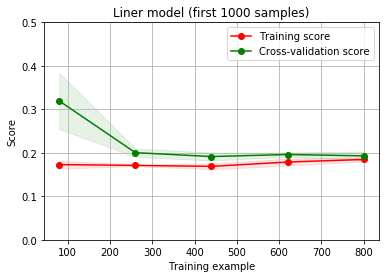

In [358]:
plot_learning_curve(LinearRegression(), 
                    'Liner model (first 1000 samples)', 
                    train_x[:1000], 
                    train_y[:1000], 
                    ylim = (0.0, 0.5), 
                    cv = 5, 
                    n_jobs = 1)  

## 2.5 多种模型对比

In [362]:
train_x = trainData[continuousFeatures]
train_y = trainData['priceLn']

### 2.5.1 线性模型 & 嵌入式特征选择

正则化（Regularization）是机器学习中一种常用的技术，其主要目的是控制模型复杂度，减小过拟合。最基本的正则化方法是在原目标（代价）函数 中添加惩罚项，对复杂度高的模型进行“惩罚”。

在过滤式和包裹式特征选择方法中，特征选择过程与学习器训练过程有明显的分别。而嵌入式特征选择在学习器训练过程中自动地进行特征选择。嵌入式选择最常用的是L1正则化与L2正则化。在对线性回归模型加入两种正则化方法后，他们分别变成了Lasso回归和岭回归。

In [363]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [364]:
models = [LinearRegression(), Ridge(), Lasso()]

In [365]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X = train_x, y = train_y, verbose = 0, cv = 5, scoring = make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
Ridge is finished
Lasso is finished


In [366]:
# 三种模型效果对比
result = pd.DataFrame(result)
result.index = ['CV' + str(x) for x in range(1, 6)]
result

,LinearRegression,Ridge,Lasso
CV1,0.192849,0.197521,0.389022
CV2,0.193839,0.198836,0.388577
CV3,0.195087,0.200000,0.391546
CV4,0.193337,0.198249,0.385686
CV5,0.194994,0.200022,0.389831


intercept: 23.285851819818873


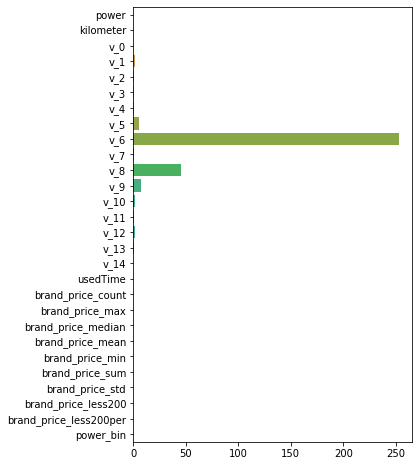

In [377]:
# 线性模型截距与不同特征的系数，系数与特征重要性呈正相关
LRModel = LinearRegression().fit(train_x, train_y)
print('intercept: '+ str(LRModel.intercept_))
plt.figure(figsize = (5, 8))
sns.barplot(abs(LRModel.coef_), continuousFeatures)

L2正则化在拟合过程中通常都倾向于让权值尽可能小，最后构造一个所有参数都比较小的模型。因为一般认为参数值小的模型比较简单，能适应不同的数据集，也在一定程度上避免了过拟合现象。可以设想一下对于一个线性回归方程，若参数很大，那么只要数据偏移一点点，就会对结果造成很大的影响；但如果参数足够小，数据偏移得多一点也不会对结果造成什么影响，即抗扰动能力强。

intercept: 7.514206381778596


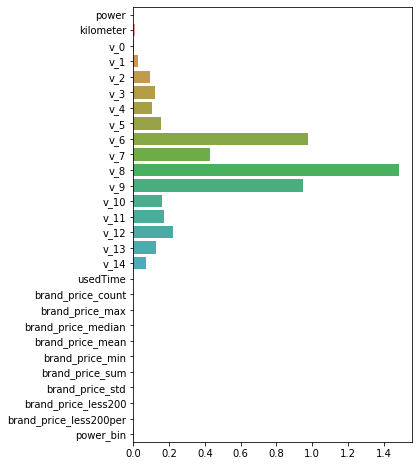

In [376]:
# L2正则化：岭回归
RidgeModel = Ridge().fit(train_x, train_y)
print('intercept: '+ str(RidgeModel.intercept_))
plt.figure(figsize = (5, 8))
sns.barplot(abs(RidgeModel.coef_), continuousFeatures)

L1正则化有助于生成一个稀疏权值矩阵，进而可以用于特征选择。如下图，power与userd_time特征非常重要。

intercept:8.678634543587087


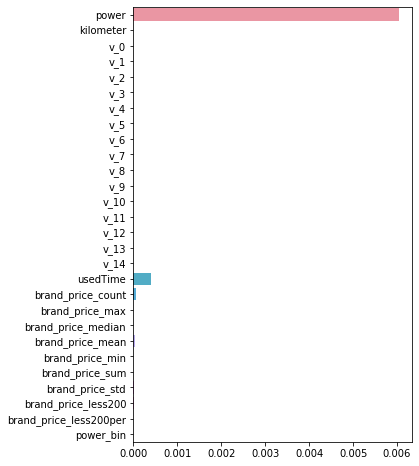

In [375]:
# L1正则化：Lasso回归
LassoModel = Lasso().fit(train_x, train_y)
print('intercept:'+ str(LassoModel.intercept_))
plt.figure(figsize = (5, 8))
sns.barplot(abs(LassoModel.coef_), continuousFeatures)

除此之外，决策树通过信息熵或GINI指数选择分裂节点时，优先选择的分裂特征也更加重要，这同样是一种特征选择的方法。XGBoost与LightGBM模型中的model_importance指标正是基于此计算得到。

### 2.5.2 非线性模型

除了线性模型以外，还有许多常用的非线性模型，如支持向量机（SVM）、决策树与Boosting、神经网络等。这里选择部分常用模型与线性模型进行效果比对。

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [289]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor(solver = 'lbfgs', max_iter = 100), 
          XGBRegressor(n_estimators = 100, objective = 'reg:squarederror'), 
          LGBMRegressor(n_estimators = 100)]

In [291]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_x, y=train_y, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
GradientBoostingRegressor is finished
MLPRegressor is finished
XGBRegressor is finished
LGBMRegressor is finished


In [292]:
result = pd.DataFrame(result)
result.index = ['CV' + str(x) for x in range(1, 6)]
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
CV1,0.192849,0.189438,0.141552,0.172501,180.014036,0.140958,0.143989
CV2,0.193839,0.189305,0.142391,0.174226,207.692808,0.139843,0.145697
CV3,0.195087,0.192426,0.142833,0.174921,421.458395,0.140823,0.146517
CV4,0.193337,0.191380,0.142705,0.171952,116.542759,0.139290,0.144263
CV5,0.194994,0.188015,0.142274,0.174630,467.148847,0.141102,0.145832


可见XGBRegressor和随机森林模型在每一个fold中均取得了更好的效果。

## 2.6 模型调参

三种常用调参方法：
* 贪心算法 https://www.jianshu.com/p/ab89df9759c8
* 网格调参 https://blog.csdn.net/weixin_43172660/article/details/83032029
* 贝叶斯调参 https://blog.csdn.net/linxid/article/details/81189154

以下使用LightGBM模型的参数调节来演示：

In [293]:
## LGB参数集合
objective = ['regression', 'regression_l1', 'mape', 'huber', 'fair']
num_leaves = [3,5,10,15,20,40, 55]
max_depth = [3,5,10,15,20,40, 55]
bagging_fraction = []
feature_fraction = []
drop_rate = []

### 2.6.1 贪心调参

In [296]:
best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective = obj)
    score = np.mean(cross_val_score(model, X = train_x, y = train_y, verbose = 0, cv = 5, scoring = make_scorer(mean_absolute_error)))
    best_obj[obj] = score
    
best_leaves = dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective = min(best_obj.items(), key = lambda x:x[1])[0], num_leaves = leaves)
    score = np.mean(cross_val_score(model, X = train_x, y = train_y, verbose = 0, cv = 5, scoring = make_scorer(mean_absolute_error)))
    best_leaves[leaves] = score
    
best_depth = dict()
for depth in max_depth:
    model = LGBMRegressor(objective = min(best_obj.items(), key = lambda x:x[1])[0],
                          num_leaves = min(best_leaves.items(), key = lambda x:x[1])[0],
                          max_depth = depth)
    score = np.mean(cross_val_score(model, X = train_x, y = train_y, verbose = 0, cv = 5, scoring = make_scorer(mean_absolute_error)))
    best_depth[depth] = score

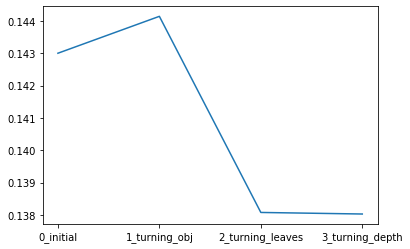

In [299]:
sns.lineplot(x = ['0_initial', 
                  '1_turning_obj', 
                  '2_turning_leaves', 
                  '3_turning_depth'], 
             y = [0.143 ,
                  min(best_obj.values()), 
                  min(best_leaves.values()), 
                  min(best_depth.values())]
            )

### 2.6.2 Grid Search调参

In [300]:
from sklearn.model_selection import GridSearchCV

In [301]:
# 计算时间警告！！！
parameters = {'objective': objective , 'num_leaves': num_leaves, 'max_depth': max_depth}
model = LGBMRegressor()
clf = GridSearchCV(model, parameters, cv = 5)
clf = clf.fit(train_X, train_y)

In [302]:
clf.best_params_

{'max_depth': 15, 'num_leaves': 55, 'objective': 'huber'}

In [303]:
model = LGBMRegressor(objective = 'huber',
                          num_leaves = 55,
                          max_depth = 15)

In [304]:
np.mean(cross_val_score(model, X = train_x, y = train_y, verbose = 0, cv = 5, scoring = make_scorer(mean_absolute_error)))

0.1386040208710973

### 2.6.3 贝叶斯调参

In [310]:
from bayes_opt import BayesianOptimization

In [311]:
def rf_cv(num_leaves, max_depth, subsample, min_child_samples):
    val = cross_val_score(
        LGBMRegressor(objective = 'regression_l1',
                      num_leaves = int(num_leaves),
                      max_depth = int(max_depth),
                      subsample = subsample,
                      min_child_samples = int(min_child_samples)
        ),
        X = train_x, y = train_y, verbose = 0, cv = 5, scoring = make_scorer(mean_absolute_error)
    ).mean()
    return 1 - val

In [312]:
rf_bo = BayesianOptimization(
    rf_cv,
    {
    'num_leaves': (2, 100),
    'max_depth': (2, 100),
    'subsample': (0.1, 1),
    'min_child_samples': (2, 100)
    }
)

In [313]:
rf_bo.maximize()

|   iter    |  target   | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------
|  1        |  0.8656   |  56.01    |  22.38    |  85.63    |  0.394    |
|  2        |  0.855    |  18.31    |  49.1     |  29.99    |  0.3483   |
|  3        |  0.8568   |  65.96    |  50.51    |  34.25    |  0.4543   |
|  4        |  0.861    |  89.92    |  87.99    |  49.24    |  0.2976   |
|  5        |  0.8454   |  86.51    |  50.65    |  15.58    |  0.465    |
|  6        |  0.8666   |  13.02    |  99.54    |  99.91    |  0.4491   |
|  7        |  0.8667   |  99.4     |  91.68    |  98.53    |  0.8271   |
|  8        |  0.8062   |  2.017    |  2.565    |  92.22    |  0.5293   |
|  9        |  0.8162   |  3.654    |  96.7     |  5.051    |  0.8489   |
|  10       |  0.8598   |  99.6     |  2.234    |  44.84    |  0.4183   |
|  11       |  0.8659   |  53.85    |  19.7     |  87.14    |  0.8364   |
|  12       |  0.8019   |  17.92    | 

In [314]:
1 - rf_bo.max['target']

0.13313001787941547

# 3. 总结

本章完成了建模与调参，并对模型进行了验证。此外，还采用了一些基本方法来提高预测的精度，提升如下图所示:

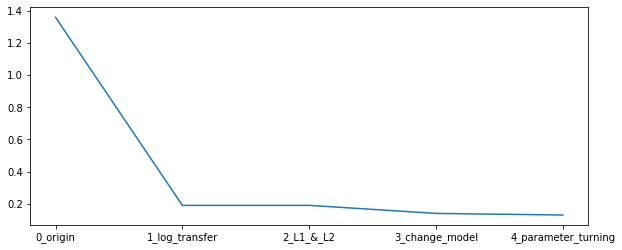

In [373]:
plt.figure(figsize = (10, 4))
sns.lineplot(x = ['0_origin','1_log_transfer','2_L1_&_L2','3_change_model','4_parameter_turning'], y = [1.36 ,0.19, 0.19, 0.14, 0.13])